<a href="https://colab.research.google.com/github/LakshmanGoel/YbIII/blob/main/zeeman_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Zeeman slower design calculator & plotter for 171Yb (399 nm line)
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# constants
hbar = 1.054_571_817e-34    # J·s
mu_B = 9.274_010_0783e-24   # J/T
mu0  = 4*np.pi*1e-7   # H/m
amu  = 1.660_539_066_60e-27   # kg


In [21]:
# Yb-171, 399 nm line data
lam = 399e-9    # m
k = 2*np.pi/lam   # 1/m
gamma = 2 * np.pi * 29e6    # Hz
m = 171 * amu   # kg

In [35]:
# Zeeman slower parameters
u0 = 300.0    # m/s, oven atom speed
v_cap = 10.0    # m/s, exit speed (MOT-capture-compatible)
s = 1.0     # saturation parameter I/Isat; η = s/(1+s)
detuning_MHz = 0    # laser detuning Δ0 in MHz (angular: 2π*MHz below)
g_eff = 1.0   # μ_eff ≈ g_eff * μ_B (≈1 for 1P1 cycling branch)
I_design = 5.0    # A, coil current used for "long solenoid" turns-per-meter estimate
bore_radius = 0.015   # m, chosen bore (just for dimension reporting)

In [36]:
# calculated parameters
eta = s/(1.0 + s)
a_max = hbar * k * gamma / (2*m)      # m/s^2, assumes s >> 1
a = eta * a_max
Delta0 = 2*np.pi * detuning_MHz * 1e6   # true detuning
mu_eff = g_eff * mu_B

In [37]:
# parameter sanity checks
if v_cap >= u0:
    raise ValueError("v_cap must be < u0 (you can't 'slow' to a higher speed).")
if eta <= 0 or eta > 1:
    raise ValueError("Invalid saturation parameter s. Expect s>=0 giving 0<η<1.")


In [38]:
# experiemtnal calculations
L = (u0**2) / (2*eta*a_max)    # slower length if V(z) = 0

N = 100
z = np.linspace(0.0, L, N)    # position grid

v = u0 * np.sqrt(1 - (z/L))   # atomic velocity profile

B0 = hbar*Delta0/mu_eff   # B field profile (absolute B; sign/polarity set by coil orientation)
Bl = hbar*k*u0/mu_eff
Bz = Bl*np.sqrt(1-(z/L)) + B0   # clarifying calc

B_start = Bz[0]   # endpoints
B_end = Bz[-1]
T_flight = (u0 - v_cap) / a  # time spent inside slower under constant acceleration

#print(Bz)

# B ≈ μ0 n I  =>  n(z) = B(z) / (μ0 I)
n_turns_per_m = Bz / (mu0 * I_design)   # long-solenoid winding density (turns per meter) estimate


In [39]:
# outputs
print("=== 171Yb Zeeman slower (constant-a design) ===")
print(f"Line λ = {lam*1e9:.1f} nm, γ = {gamma/1e6:.2f} MHz")
print(f"m = {m:.3e} kg, k = {k:.3e} 1/m, ħkγ/(2m) = a_max = {a_max:.3f} m/s^2")
print(f"s = {s:.3f}  ->  η = {eta:.3f},  a = η a_max = {a:.3f} m/s^2")
print(f"u0 = {u0:.1f} m/s  →  v_cap = {v_cap:.1f} m/s")
print(f"Design length L = {L*100:.1f} cm")
print(f"Transit time through slower ≈ {T_flight*1e3:.1f} ms")
print(f"μ_eff = g_eff μ_B, g_eff = {g_eff:.3f}  →  μ_eff = {mu_eff:.3e} J/T")
print(f"Δ0 = {detuning_MHz:.1f} MHz  →  B0 = ħΔ0/μ_eff = {B0:.3f} T  ({B0*1e4:.1f} G)")
print(f"B(z) at entrance (z=0):   {B_start:.3f} T  ({B_start*1e4:.1f} G)")
print(f"B(z) at exit (z=L):       {B_end:.3f} T  ({B_end*1e4:.1f} G)")
print(f"Chosen bore radius: {bore_radius*1e3:.0f} mm (user-specified)")

print(f"\nCoil current for estimate: I = {I_design:.1f} A")
print(f"Long-solenoid turns/m at entrance: n(0) ≈ {n_turns_per_m[0]:.1f} 1/m")
print(f"Long-solenoid turns/m at exit:     n(L) ≈ {n_turns_per_m[-1]:.1f} 1/m")
print("Note: Real builds use segmented coils; this n(z) is a first-pass target.")


=== 171Yb Zeeman slower (constant-a design) ===
Line λ = 399.0 nm, γ = 182.21 MHz
m = 2.840e-25 kg, k = 1.575e+07 1/m, ħkγ/(2m) = a_max = 532826.475 m/s^2
s = 1.000  ->  η = 0.500,  a = η a_max = 266413.238 m/s^2
u0 = 300.0 m/s  →  v_cap = 10.0 m/s
Design length L = 16.9 cm
Transit time through slower ≈ 1.1 ms
μ_eff = g_eff μ_B, g_eff = 1.000  →  μ_eff = 9.274e-24 J/T
Δ0 = 0.0 MHz  →  B0 = ħΔ0/μ_eff = 0.000 T  (0.0 G)
B(z) at entrance (z=0):   0.054 T  (537.2 G)
B(z) at exit (z=L):       0.000 T  (0.0 G)
Chosen bore radius: 15 mm (user-specified)

Coil current for estimate: I = 5.0 A
Long-solenoid turns/m at entrance: n(0) ≈ 8549.8 1/m
Long-solenoid turns/m at exit:     n(L) ≈ 0.0 1/m
Note: Real builds use segmented coils; this n(z) is a first-pass target.


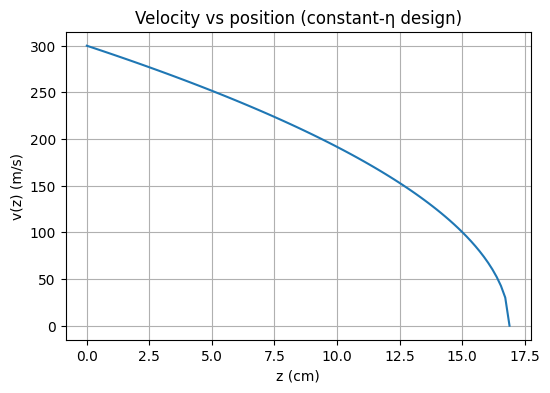

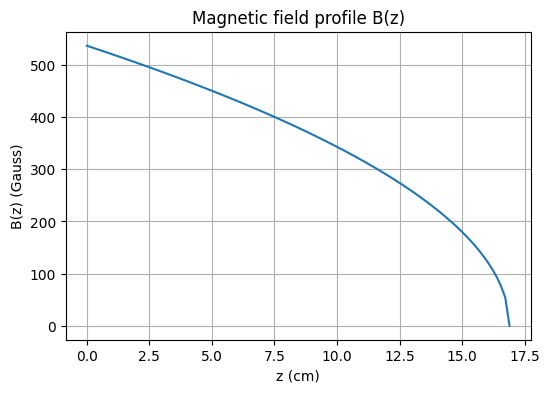

In [40]:
# plots
plt.figure(figsize=(6,4))
plt.plot(z*100, v)
plt.xlabel("z (cm)")
plt.ylabel("v(z) (m/s)")
plt.title("Velocity vs position (constant-η design)")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(z*100, Bz*1e4)
plt.xlabel("z (cm)")
plt.ylabel("B(z) (Gauss)")
plt.title("Magnetic field profile B(z)")
plt.grid(True)
plt.show()